In [4]:
import pandas as pd
import numpy as np 
import csv

In [5]:
# read in dataset
data = pd.read_csv('results.csv')
data = data.rename(columns={'ad':'Q', 'per_y':'P', 'om':'node'}).drop(columns = ['rot_per','n_obs_used','data_arc','extent', 'condition_code', 'n_del_obs_used', 'node', 'n_dop_obs_used','IR'])
len(data)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


990040

In [170]:
data.describe()

,a,e,i,w,q,Q,P,H,diameter,albedo,GM,BV,UB
count,990040.000000,990040.000000,990040.000000,990040.000000,990040.000000,990035.000000,9.900350e+05,984089.000000,140194.000000,139016.000000,1.400000e+01,1021.000000,979.000000
mean,2.872107,0.155489,9.049470,181.411990,2.396726,3.391370,8.457926e+00,16.924199,5.447761,0.129887,7.821928e+00,0.769212,0.364396
std,22.212392,0.092293,6.616341,103.853814,2.119668,32.869698,1.926285e+03,1.778479,9.303902,0.110226,1.678880e+01,0.088625,0.095780
min,-13477.905376,0.000000,0.007744,0.000130,0.070511,0.653773,4.139405e-01,-1.100000,0.002500,0.001000,2.100000e-09,0.580000,0.120000
25%,2.389460,0.091703,4.178166,91.571680,1.973912,2.783533,3.693675e+00,16.100000,2.756000,0.053000,1.022225e-03,0.700000,0.289000
50%,2.649530,0.144443,7.430747,182.477748,2.230646,3.049144,4.312826e+00,16.900000,3.940000,0.078000,6.192500e-01,0.743000,0.360000
75%,3.004842,0.200062,12.385812,271.494400,2.582810,3.365801,5.208838e+00,17.800000,5.721000,0.188000,6.500000e+00,0.850000,0.439000
max,15364.169438,1.855356,175.977101,359.999646,80.398819,30724.716394,1.904460e+06,33.200000,939.400000,1.000000,6.262840e+01,1.077000,0.655000


In [6]:
# look at first 20 rows
data.head(20)

,full_name,a,e,i,w,q,Q,P,H,diameter,albedo,GM,BV,UB,spec_B,spec_T
0,'Oumuamua (A/2017 U1),-1.272345,1.201134,122.741706,241.810536,0.255912,NaN,NaN,22.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(1927 LA),3.344071,0.333618,17.631498,341.109510,2.228428,4.459715,6.115353,11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(1935 UZ),2.157511,0.251290,4.757745,281.188594,1.615350,2.699672,3.169114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(1937 CK),2.320184,0.137423,6.548047,130.269969,2.001338,2.639030,3.534206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(1939 RR),2.904675,0.253684,13.139290,64.837530,2.167804,3.641545,4.950561,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,(1942 RH),2.257216,0.145324,4.223980,134.532390,1.929189,2.585242,3.391312,13.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,(1960 SB1),3.008002,0.530847,10.410628,218.631514,1.411214,4.604791,5.217055,17.222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,(1979 MW5),3.188525,0.297586,9.393654,161.050508,2.239664,4.137386,5.693678,16.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,(1979 XB),2.228139,0.708457,24.734332,75.579804,0.649598,3.806681,3.325996,18.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,(1981 EG6),2.906378,0.298918,6.546141,194.977288,2.037608,3.775147,4.954916,17.267,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
diameter_known = data[data['diameter'].notnull()]
len(diameter_known)
diameter_known

,full_name,a,e,i,w,q,Q,P,H,diameter,albedo,GM,BV,UB,spec_B,spec_T
187,(1994 VX3),2.577301,0.171286,9.034627,299.867270,2.135845,3.018757,4.137671,18.0,2.069,0.029,NaN,NaN,NaN,NaN,NaN
369,(1995 SL79),2.535925,0.042182,3.620685,143.071643,2.428955,2.642896,4.038433,17.2,2.746,0.148,NaN,NaN,NaN,NaN,NaN
667,(1996 GQ),1.987785,0.495608,0.884755,59.307716,1.002622,2.972948,2.802607,23.1,0.208,0.024,NaN,NaN,NaN,NaN,NaN
726,(1996 RX16),2.763051,0.230394,13.457159,188.734318,2.126462,3.399640,4.592949,17.0,2.311,0.120,NaN,NaN,NaN,NaN,NaN
954,(1997 SK7),3.150207,0.217833,5.193760,255.209472,2.463987,3.836427,5.591352,17.2,2.184,0.071,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985591,541629 (2011 UF157),2.542067,0.265911,2.836836,208.485275,1.866102,3.218031,4.053112,17.6,2.452,0.029,NaN,NaN,NaN,NaN,NaN
987859,543897 (2014 QJ266),2.579857,0.246474,18.680232,236.134893,1.943990,3.215723,4.143826,16.7,2.620,0.049,NaN,NaN,NaN,NaN,NaN
987973,544011 (2014 QZ491),2.580945,0.166455,10.065306,207.348526,2.151333,3.010556,4.146448,17.4,1.858,0.074,NaN,NaN,NaN,NaN,NaN
988304,544342 (2014 UE116),2.772000,0.276348,17.031480,282.339833,2.005965,3.538036,4.615281,16.9,3.616,0.023,NaN,NaN,NaN,NaN,NaN


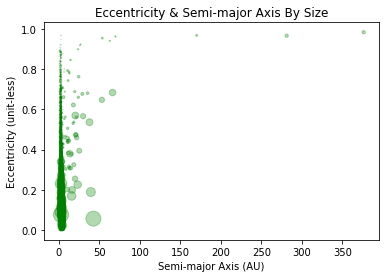

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(diameter_known['a'], diameter_known['e'], diameter_known['diameter'], marker='.', c="g", alpha=0.3)
plt.title('Eccentricity & Semi-major Axis By Size')
plt.ylabel('Eccentricity (unit-less)')
plt.xlabel('Semi-major Axis (AU)')
plt.show()

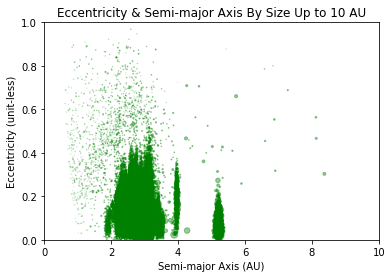

In [187]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(diameter_known['a'], diameter_known['e'], diameter_known['diameter'], marker='.', c="g", alpha=0.4)
plt.title('Eccentricity & Semi-major Axis By Size Up to 10 AU')
plt.ylabel('Eccentricity (unit-less)')
plt.xlabel('Semi-major Axis (AU)')
plt.xlim(0,10)
plt.ylim(0,1.)
plt.show()

In [8]:
NEAs = data[data['q'] < 1.3]
len(NEAs)
NEAs

,full_name,a,e,i,w,q,Q,P,H,diameter,albedo,GM,BV,UB,spec_B,spec_T
0,'Oumuamua (A/2017 U1),-1.272345,1.201134,122.741706,241.810536,0.255912,NaN,NaN,22.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,(1979 XB),2.228139,0.708457,24.734332,75.579804,0.649598,3.806681,3.325996,18.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,(1982 YA),3.648792,0.691073,35.119460,144.386456,1.127210,6.170374,6.969986,18.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,(1983 LC),2.601034,0.715027,1.562867,184.852534,0.741224,4.460845,4.194955,19.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,(1986 NA),1.932942,0.402050,9.454580,37.588883,1.155802,2.710081,2.687425,19.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983656,539694 (2016 TE93),1.035425,0.175686,22.731296,353.210029,0.853515,1.217335,1.053625,21.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983818,539856 (2017 EV2),1.010207,0.557580,16.486406,32.208807,0.446935,1.573478,1.015369,20.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983902,539940 (2017 HW1),2.137451,0.458869,33.944796,168.892116,1.156640,3.118262,3.125017,17.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987281,543319 (2013 YE38),2.066471,0.624424,34.167278,281.768899,0.776118,3.356824,2.970654,20.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Apollos = data[(data['q'] < 1.017) & (data['a'] > 1.0)]
len(Apollos)
Apollos

,full_name,a,e,i,w,q,Q,P,H,diameter,albedo,GM,BV,UB,spec_B,spec_T
8,(1979 XB),2.228139,0.708457,24.734332,75.579804,0.649598,3.806681,3.325996,18.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,(1983 LC),2.601034,0.715027,1.562867,184.852534,0.741224,4.460845,4.194955,19.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,(1989 AZ),1.647604,0.468207,11.789958,111.993172,0.876185,2.419024,2.114889,19.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,(1990 UN),1.709865,0.528063,3.684233,97.002186,0.806949,2.612781,2.235893,23.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,(1991 BA),2.187713,0.673026,1.937553,70.686821,0.715326,3.660099,3.235889,28.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983025,539063 (2016 MK1),1.500936,0.715769,10.775265,240.669100,0.426612,2.575259,1.838871,19.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983656,539694 (2016 TE93),1.035425,0.175686,22.731296,353.210029,0.853515,1.217335,1.053625,21.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983818,539856 (2017 EV2),1.010207,0.557580,16.486406,32.208807,0.446935,1.573478,1.015369,20.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987281,543319 (2013 YE38),2.066471,0.624424,34.167278,281.768899,0.776118,3.356824,2.970654,20.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Amors = data[(1.017 < data['q']) & (data['q'] < 1.3) & (data['a'] > 1.0)]
len(Amors)
Amors

,full_name,a,e,i,w,q,Q,P,H,diameter,albedo,GM,BV,UB,spec_B,spec_T
12,(1982 YA),3.648792,0.691073,35.119460,144.386456,1.127210,6.170374,6.969986,18.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,(1986 NA),1.932942,0.402050,9.454580,37.588883,1.155802,2.710081,2.687425,19.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,(1988 NE),2.248372,0.442341,9.637167,3.602651,1.253825,3.242920,3.371402,19.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,(1991 JR),1.405706,0.260965,10.144344,206.999695,1.038866,1.772546,1.666672,23.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,(1991 XB),2.958751,0.583270,16.282479,172.662849,1.233000,4.684502,5.089450,18.8,NaN,NaN,NaN,NaN,NaN,K,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981357,537395 (2015 LG2),1.259427,0.181574,21.286212,188.883521,1.030748,1.488107,1.413409,20.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981429,537467 (2015 ME54),1.639990,0.343942,14.138763,85.669864,1.075929,2.204050,2.100244,20.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981648,537686 (2015 SA17),1.658623,0.316988,42.557094,321.257214,1.132860,2.184386,2.136140,18.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
982941,538979 (2016 KE),2.199389,0.429136,22.740506,79.670392,1.255551,3.143226,3.261829,19.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Atens = data[(data['Q'] > 0.983) & (data['a'] < 1.0)]
len(Atens)
Atens

,full_name,a,e,i,w,q,Q,P,H,diameter,albedo,GM,BV,UB,spec_B,spec_T
73,(1993 DA),0.936024,0.092850,12.385404,354.045409,0.849114,1.022935,0.905605,26.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,(1994 GL),0.683497,0.503855,3.678879,179.495389,0.339114,1.027880,0.565084,24.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,(1994 WR12),0.757108,0.397113,6.858690,206.066442,0.456450,1.057766,0.658787,22.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,(1995 CR),0.906941,0.868435,4.067018,322.581273,0.119322,1.694560,0.863728,21.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,(1996 BG1),0.896658,0.280088,3.821684,150.910103,0.645514,1.147801,0.849079,23.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972769,528807 (2009 BL71),0.936677,0.265729,5.545887,292.432728,0.687775,1.185579,0.906553,22.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
974900,530938 (2011 XE),0.783749,0.463430,20.728150,46.593616,0.420536,1.146961,0.693862,19.3,0.413,0.197,NaN,NaN,NaN,NaN,NaN
975022,531060 (2012 DJ61),0.917571,0.515401,53.633131,311.958163,0.444654,1.390488,0.878957,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
975861,531899 (2013 BE19),0.911326,0.297466,31.006780,311.977135,0.640237,1.182415,0.869999,19.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
Atiras = data[(data['Q'] < 0.983) & (data['a'] < 1.0)]
len(Atiras)
Atiras

,full_name,a,e,i,w,q,Q,P,H,diameter,albedo,GM,BV,UB,spec_B,spec_T
1094,(1998 DK36),0.692257,0.416017,2.017520,180.042707,0.404267,0.980248,0.575983,25.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68635,(2006 WE4),0.784742,0.182917,24.767269,318.614353,0.641199,0.928285,0.695182,18.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152884,(2010 XB11),0.618013,0.533898,29.886993,202.483740,0.288057,0.947969,0.485853,19.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197335,(2012 VE46),0.713035,0.361284,6.674995,190.520423,0.455427,0.970643,0.602108,20.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213931,(2013 JX28),0.600885,0.564036,10.761576,354.890407,0.261964,0.939806,0.465796,20.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223140,(2013 TQ5),0.773692,0.155574,16.399044,247.295974,0.653325,0.894058,0.680550,19.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237260,(2014 FO47),0.752132,0.271125,19.197134,347.457085,0.548210,0.956053,0.652303,20.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296402,(2015 DR215),0.666413,0.471505,4.088190,42.279205,0.352196,0.980630,0.544031,20.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311743,(2015 ME131),0.806118,0.204225,30.236744,162.273931,0.641489,0.970747,0.723779,19.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412519,(2017 XA1),0.809600,0.201548,17.176994,327.615993,0.646427,0.972773,0.728474,21.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Total**  
NEAs: 23,174 (2.3%)  
Apollos: 12,812 (1.3%)  
Amors: 8,584 (0.87%)  
Atens: 1,754 (0.2%)  
Atiras: 23 (0.002%)  

Text(0.5, 0, 'Type')

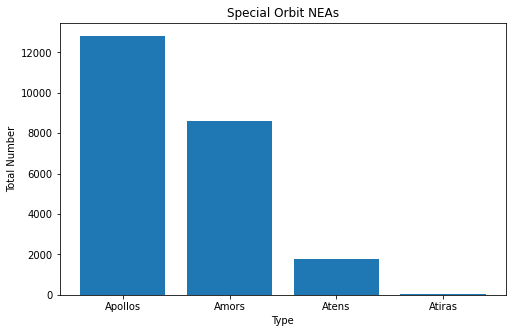

In [165]:
### SPECIAL ORBIT ASTEROIDS
plt.figure(figsize=(8, 5))

orb_type = ['Apollos', 'Amors', 'Atens', 'Atiras']
values = [len(Apollos), len(Amors), len(Atens), len(Atiras)]
plt.bar(orb_type, values)
plt.title('Special Orbit NEAs')
plt.ylabel('Total Number')
plt.xlabel('Type')



**A Look At Eccentricity, Semi-major Axis and Inclination As Factors**

In [13]:
# eccentricity vs. semi-major axis
a = data[['a']]
e = data[['e']]
a_and_e = data[['a', 'e']]
a_and_e

,a,e
0,-1.272345,1.201134
1,3.344071,0.333618
2,2.157511,0.251290
3,2.320184,0.137423
4,2.904675,0.253684
...,...,...
990035,1.820110,0.109933
990036,3.132244,0.146923
990037,3.233027,0.095349
990038,2.996593,0.087917


In [14]:
# inclination vs. semi-major axis
a = data[['a']]
i = data[['i']]
a_and_i = data[['a', 'i']]
a_and_i

,a,i
0,-1.272345,122.741706
1,3.344071,17.631498
2,2.157511,4.757745
3,2.320184,6.548047
4,2.904675,13.139290
...,...,...
990035,1.820110,23.555512
990036,3.132244,11.794842
990037,3.233027,15.766689
990038,2.996593,26.682787


In [15]:
# all 3
a_e_i = data[['a', 'e', 'i']]
a_e_i

,a,e,i
0,-1.272345,1.201134,122.741706
1,3.344071,0.333618,17.631498
2,2.157511,0.251290,4.757745
3,2.320184,0.137423,6.548047
4,2.904675,0.253684,13.139290
...,...,...,...
990035,1.820110,0.109933,23.555512
990036,3.132244,0.146923,11.794842
990037,3.233027,0.095349,15.766689
990038,2.996593,0.087917,26.682787


In [16]:
# inclination vs. eccentricity
e = data[['e']]
i = data[['i']]
e_and_i = data[['e', 'i']]
e_and_i

,e,i
0,1.201134,122.741706
1,0.333618,17.631498
2,0.251290,4.757745
3,0.137423,6.548047
4,0.253684,13.139290
...,...,...
990035,0.109933,23.555512
990036,0.146923,11.794842
990037,0.095349,15.766689
990038,0.087917,26.682787


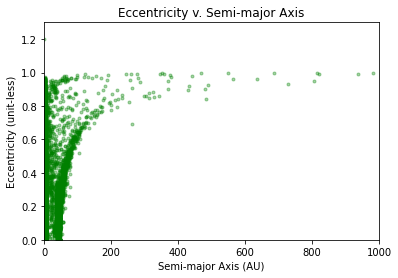

In [183]:
### Plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(data['a'], data['e'] , marker='.', c="g", alpha=0.35)
plt.title('Eccentricity v. Semi-major Axis')
plt.ylabel('Eccentricity (unit-less)')
plt.xlabel('Semi-major Axis (AU)')
plt.xlim(0,1000)
plt.ylim(0,1.3)
plt.show()

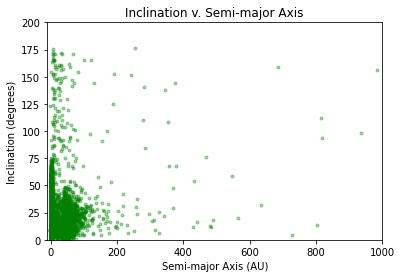

In [184]:
plt.figure()
plt.scatter(data['a'], data['i'], marker='.', c="g", alpha=0.35)
plt.title('Inclination v. Semi-major Axis')
plt.ylabel('Inclination (degrees)')
plt.xlabel('Semi-major Axis (AU)')
plt.xlim(-10,1000)
plt.ylim(0,200)
plt.show()

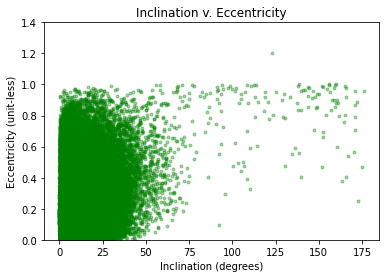

In [185]:
plt.scatter(data['i'], data['e'], marker='.', c="g", alpha=0.35)
plt.title('Inclination v. Eccentricity')
plt.xlabel('Inclination (degrees)')
plt.ylabel('Eccentricity (unit-less)')
plt.ylim(0,1.4)
plt.show()

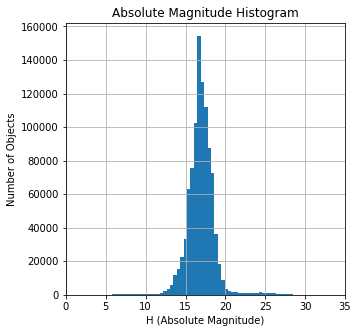

In [162]:
from sklearn.datasets import load_iris

fig = plt.figure(figsize = (5,5))
ax = fig.gca()
data['H'].hist(ax=ax, bins = 80)
plt.title('Absolute Magnitude Histogram')
plt.xlabel('H (Absolute Magnitude)')
plt.ylabel('Number of Objects')
plt.xlim(0,35)
plt.show()

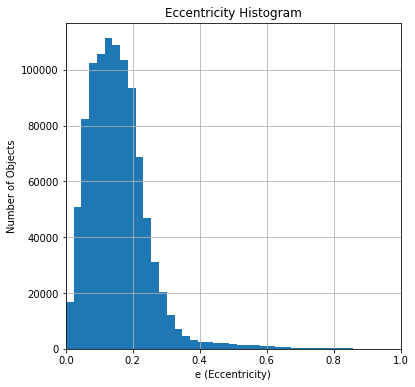

In [117]:
fig = plt.figure(figsize = (6,6))
ax = fig.gca()
data['e'].hist(ax=ax, bins = 80)
plt.title('Eccentricity Histogram')
plt.xlabel('e (Eccentricity)')
plt.ylabel('Number of Objects')
plt.xlim(0,1.)
plt.show()

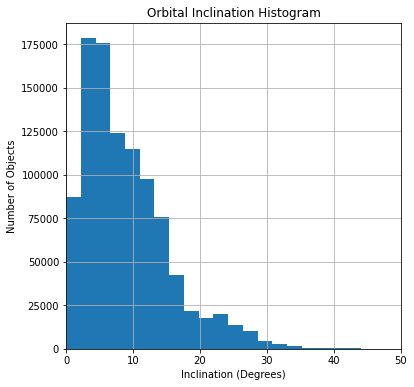

In [73]:
fig = plt.figure(figsize = (6,6))
ax = fig.gca()
data['i'].hist(ax=ax, bins = 80)
plt.title('Orbital Inclination Histogram')
plt.xlabel('Inclination (Degrees)')
plt.ylabel('Number of Objects')
plt.xlim(0,50)
plt.show()

In [137]:
a = data['a'][data['a'].notnull()]
P = data['P'][data['P'].notnull()]
len(P[:99030])
len(a[:99030])

99030

(0.0, 4500.0)

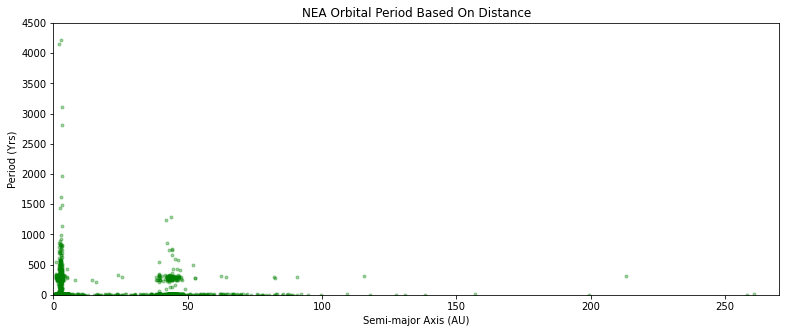

In [186]:
from scipy import optimize
plt.figure(figsize=(13, 5))

plt.scatter(a[:99035], P[:99035], marker='.', c="g", alpha=0.35)
plt.title('NEA Orbital Period Based On Distance')
plt.xlabel('Semi-major Axis (AU)')
plt.ylabel('Period (Yrs)')
plt.xlim(0,270)
plt.ylim(0,4500)

**A Look at Spectral Classification**  
C-type (carbonaceous): Very dark with an albedo of 0.03-0.09  
S-type (silicaceous): Relatively bright with an albedo of 0.10-0.22  
M-type (metallic): Relatively bright with an albedo of 0.10-0.18  

In [91]:
albedo = data[data['albedo'].notnull()]
albedo

,full_name,a,e,i,w,q,Q,P,H,diameter,albedo,GM,BV,UB,spec_B,spec_T
187,(1994 VX3),2.577301,0.171286,9.034627,299.867270,2.135845,3.018757,4.137671,18.0,2.069,0.029,NaN,NaN,NaN,NaN,NaN
369,(1995 SL79),2.535925,0.042182,3.620685,143.071643,2.428955,2.642896,4.038433,17.2,2.746,0.148,NaN,NaN,NaN,NaN,NaN
667,(1996 GQ),1.987785,0.495608,0.884755,59.307716,1.002622,2.972948,2.802607,23.1,0.208,0.024,NaN,NaN,NaN,NaN,NaN
726,(1996 RX16),2.763051,0.230394,13.457159,188.734318,2.126462,3.399640,4.592949,17.0,2.311,0.120,NaN,NaN,NaN,NaN,NaN
954,(1997 SK7),3.150207,0.217833,5.193760,255.209472,2.463987,3.836427,5.591352,17.2,2.184,0.071,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985591,541629 (2011 UF157),2.542067,0.265911,2.836836,208.485275,1.866102,3.218031,4.053112,17.6,2.452,0.029,NaN,NaN,NaN,NaN,NaN
987859,543897 (2014 QJ266),2.579857,0.246474,18.680232,236.134893,1.943990,3.215723,4.143826,16.7,2.620,0.049,NaN,NaN,NaN,NaN,NaN
987973,544011 (2014 QZ491),2.580945,0.166455,10.065306,207.348526,2.151333,3.010556,4.146448,17.4,1.858,0.074,NaN,NaN,NaN,NaN,NaN
988304,544342 (2014 UE116),2.772000,0.276348,17.031480,282.339833,2.005965,3.538036,4.615281,16.9,3.616,0.023,NaN,NaN,NaN,NaN,NaN


In [92]:
# C-type
C_type = albedo[(albedo['albedo'] <= 0.09) & (albedo['albedo'] > 0.03)]

In [93]:
# S-type
S_type = albedo[(albedo['albedo'] > 0.09) & (albedo['albedo'] <= 0.22)]

In [94]:
# M-type
M_type = albedo[(albedo['albedo'] > 0.09) & (albedo['albedo'] <= 0.18)]

**Approximate total**  
C-Type: 73,867  
S-Type: 32,612  
M-type: 24,324  

Text(0.5, 0, 'Type')

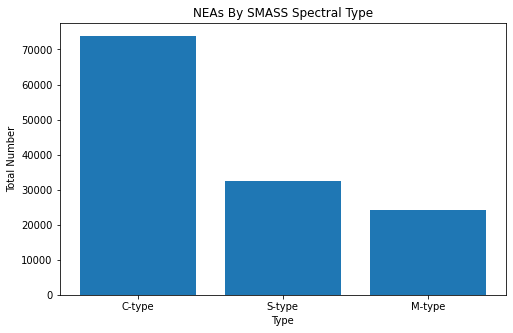

In [95]:
### ASTEROIDS BY SPECTRAL TYPE
plt.figure(figsize=(8, 5))

spec_type = ['C-type', 'S-type', 'M-type']
values = [len(C_type), len(S_type), len(M_type)]
plt.bar(spec_type, values)
plt.title('NEAs By SMASS Spectral Type')
plt.ylabel('Total Number')
plt.xlabel('Type')
